In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import CleanData as CD

In [3]:
data_dir = "data\\filter_tests\\"

## LASER ON

In [23]:
filterless = data_dir + "3_4\\curr_filter\\filterless"
one_new_filter = data_dir + "3_4\\curr_filter\\new_fiter_front_only"
curr_filter = data_dir + "3_4\\with_curr_filter"
both_new_filter = data_dir + "3_6\\new_filter_bothpoints"

In [28]:
filterless_df, filterless_settings = CD.clean_csv(filterless)
curr_filter_df, curr_filter_settings = CD.clean_csv(curr_filter)
both_new_df, both_new_settings = CD.clean_csv(both_new_filter)

In [29]:
filterless_ch1 = filterless_df['Ch 1']
curr_filter_ch1 = curr_filter_df['Ch 1']
both_new_ch1 = both_new_df['Ch 1']

In [30]:
filterless_df.head()

,Entry number,Time,Ch 1,Ch 2,Ch 3,Ch 4,Ch 5
0,0.00125,11:22:13 AM,60,10,0,0,0
1,0.00250,11:22:13 AM,64,11,0,0,0
2,0.00375,11:22:13 AM,67,5,0,0,0
3,0.00500,11:22:13 AM,66,9,0,0,0
4,0.00625,11:22:13 AM,59,16,0,0,0


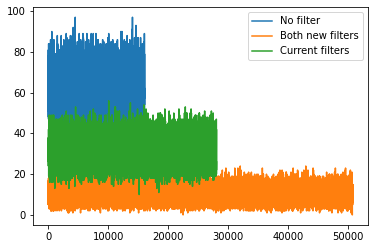

In [31]:
plt.plot(filterless_df['Ch 1'], label = "No filter")
plt.plot(both_new_df['Ch 1'], label = "Both new filters")
plt.plot(curr_filter_df['Ch 1'], label = "Current filters")
plt.legend()
plt.show()
